## Курсовая работа

Проверим предположение, что в период кризиса уровень преступности не равен уровню преступности обычного времени с уровнем значимости a = 0.05.  
За основу возьмем опубликованный на сайте kaggle.com датасет crime, содержащий информацию о количестве преступлений совершенных с 2003 по 2020 в России.  
В качестве периодов кризиса выберем месяцы из заданного диапазона дат, в которые курс доллара был наиболее нестабилен. 

In [1]:
import datetime
import numpy as np
import pandas as pd
from IPython.display import Image

In [2]:
data_crime = pd.read_csv('crime.csv')
data_crime.head(3)

,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
0,01.01.2003,214587.0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0
1,01.02.2003,221928.0,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0
2,01.03.2003,248452.0,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0


In [3]:
data_crime.month = [datetime.datetime.strptime(el, '%d.%m.%Y').strftime('%Y.%m.%d') for el in data_crime.month]
data_crime.head(3)

,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
0,2003.01.01,214587.0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0
1,2003.02.01,221928.0,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0
2,2003.03.01,248452.0,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0


Посмотрим общую картину изменения курса доллара в заданном временном диапазоне.

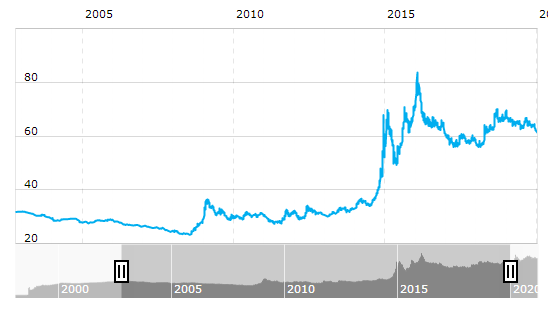

In [4]:
Image('usd_2003_2019.png')

Выделим два кризиса:  
10.2008-10.2009  
10.2014-03.2016

In [5]:
list_cr_dates = [['2008.10.01','2009.10.01'], ['2014.10.01','2016.03.01']]

In [6]:
mask = ((data_crime.month >= list_cr_dates[0][0]) & (data_crime.month <= list_cr_dates[0][1])) | ((data_crime.month >= list_cr_dates[1][0]) & (data_crime.month <= list_cr_dates[1][1]))

crisis = data_crime[mask].copy()
crisis.reset_index(inplace = True, drop = True)
crisis.head(3)

,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
0,2008.10.01,259452.0,67182.0,24320.0,3778.0,53.0,15.0,1593.0,3861.0,515.0,114595.0,5220.0,13164.0,1100.0,18539.0,2396.0
1,2008.11.01,231685.0,60709.0,21722.0,3254.0,36.0,26.0,1467.0,3631.0,473.0,96648.0,3886.0,11359.0,883.0,16858.0,1961.0
2,2008.12.01,247753.0,60852.0,21813.0,3108.0,44.0,39.0,1712.0,3709.0,464.0,106313.0,3840.0,11601.0,899.0,17020.0,2089.0


In [7]:
non_crisis = data_crime[~mask].copy()
non_crisis.reset_index(inplace = True, drop = True)
non_crisis.tail()

,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
169,2019.09.01,166208.0,38967.0,64283.0,1858.0,122.0,48.0,555.0,1570.0,306.0,67006.0,1903.0,21557.0,155.0,15100.0,1945.0
170,2019.10.01,199038.0,53319.0,81775.0,2322.0,111.0,52.0,668.0,1846.0,223.0,81053.0,2197.0,27980.0,180.0,20510.0,1744.0
171,2019.11.01,148104.0,31652.0,49623.0,1581.0,149.0,27.0,622.0,1467.0,246.0,57434.0,1344.0,19794.0,132.0,11067.0,1742.0
172,2019.12.01,155512.0,38470.0,60742.0,1526.0,164.0,52.0,534.0,1644.0,134.0,63327.0,1374.0,22588.0,155.0,13451.0,1754.0
173,2020.01.01,159172.0,44134.0,57020.0,1264.0,118.0,62.0,723.0,2075.0,296.0,53977.0,1092.0,22189.0,153.0,15463.0,2104.0


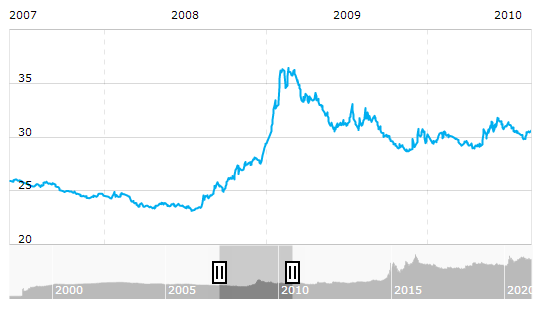

In [8]:
Image('usd_2008_2009.png')

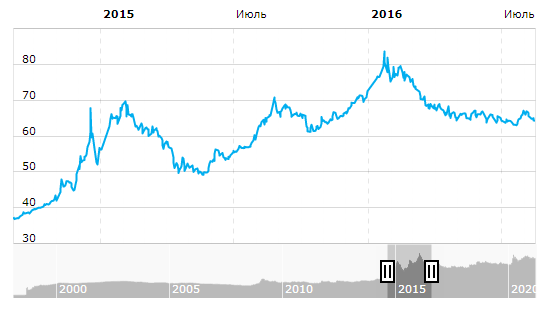

In [9]:
Image('usd_2014_2016.png')

Теперь необходимо найти среднее кочество преступлений в благополучное время и в кризис. Нулевая гипотеза будет утверждать, что различий между этими средними нет, а альтернативная гипотеза, что различия есть.

In [10]:
x_ = crisis.Total_crimes.mean()
var_x = crisis.Total_crimes.var()
n = crisis.month.count()

print(f'Среднее количество преступлений во время кризиса - {x_}\n\
Дисперсия - {var_x}\n\
Количество измерений - {n}')

Среднее количество преступлений в годы кризиса - 219811.2258064516
Дисперсия - 1169884958.780645
Количество измерений - 31


In [11]:
y_ = non_crisis.Total_crimes.mean()
var_y = non_crisis.Total_crimes.var()
m = non_crisis.month.count()

print(f'Среднее количество преступлений в нормальное время - {y_}\n\
Дисперсия - {var_y}\n\
Количество измерений - {m}')

Среднее количество преступлений в годы без кризиса - 221540.52298850575
Дисперсия - 2951053815.002358
Количество измерений - 174


In [12]:
z = (x_ - y_)/np.sqrt(var_x/n + var_y/m)
z

-0.23382056412610921

In [13]:
z_0475 = 2.05

if abs(z) < z_0475:
    print(f'Нулевая гипотеза принимается - среднее количество преступлений в месяц не зависит от кризиса')
else:
    print('Принимается альтернативная гипотеза - среднее количество преступлений в кризис не равно среднему количеству преступлений в нормальное время')

Нулевая гипотеза принимается - среднее количество преступлений в месяц не зависит от кризиса


Итак, первоначальное предположение, что среднее количество преступлений в месяцы кризиса не равно количеству преступлений в месяцы без кризиса не подтвердилось.  
Посмотрим значения статистик первоначального датасета:

In [14]:
data_crime.describe()

,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,221279.019512,59068.487805,38402.039024,2592.463415,197.839024,59.473171,1451.400000,3276.024390,463.580488,92647.560976,4101.414634,15277.834146,1457.648780,17644.356098,2525.019512
std,51720.759692,20501.515982,20755.286960,1028.101551,245.462645,42.070500,687.713793,1013.861819,188.413369,25376.346430,1565.682727,4114.474680,2560.889194,3068.123707,733.169890
min,137657.000000,15755.000000,7424.000000,1216.000000,12.000000,2.000000,534.000000,1467.000000,134.000000,50155.000000,1092.000000,5687.000000,132.000000,7275.000000,1637.000000
25%,180711.000000,42135.000000,21813.000000,1888.000000,57.000000,26.000000,932.000000,2479.000000,322.000000,72533.000000,2928.000000,12481.000000,261.000000,16006.000000,2029.000000
50%,207550.000000,51426.000000,26357.000000,2322.000000,103.000000,52.000000,1200.000000,3256.000000,419.000000,88095.000000,3923.000000,15303.000000,486.000000,17924.000000,2351.000000
75%,254352.000000,78407.000000,59282.000000,3034.000000,184.000000,87.000000,1975.000000,4152.000000,574.000000,107555.000000,5125.000000,18005.000000,1785.000000,19686.000000,2868.000000
max,359098.000000,108299.000000,87941.000000,6822.000000,1198.000000,174.000000,3099.000000,5578.000000,1027.000000,153394.000000,8251.000000,27980.000000,12636.000000,25187.000000,5938.000000


Из таблицы выше видно, что в столбце терроризм std (стандартное отклонение) превышает значение среднего.  
Проверим гипотезу, что в кризис финансирование терроризма уменьшается, и как следствие, уменьшается количество преступлений такого характера.

In [15]:
x_ = crisis.Terrorism.mean()
var_x = crisis.Terrorism.var()
n = crisis.month.count()

print(f'Среднее количество преступлений во время кризиса - {x_}\n\
Дисперсия - {var_x}\n\
Количество измерений - {n}')

Среднее количество преступлений в годы кризиса - 113.70967741935483
Дисперсия - 4767.079569892475
Количество измерений - 31


In [20]:
y_ = non_crisis.Terrorism.mean()
var_y = non_crisis.Terrorism.var()
m = non_crisis.month.count()

print(f'Среднее количество преступлений в нормальное время - {y_}\n\
Дисперсия - {var_y}\n\
Количество измерений - {m}')

Среднее количество преступлений в нормальное время - 212.82758620689654
Дисперсия - 68727.61172015152
Количество измерений - 174


In [17]:
z = (x_ - y_)/np.sqrt(var_x/n + var_y/m)
z

-4.231162511251688

In [21]:
z_045 = -1.64

if z > z_045:
    print(f'Нулевая гипотеза принимается - среднее количество террористических преступлений в месяц не зависит от кризиса')
else:
    print('Принимается альтернативная гипотеза - среднее количество террористических преступлений в кризис меньше среднего количества преступлений в нормальное время')

Принимается альтернативная гипотеза - среднее количество террористических преступлений в кризис меньше среднего количества преступлений в нормальное время
